In [1]:
# Run on GPU server
import sys
sys.path.append("../StockPriceForecast/")

from libs import *
from libs.modules import *
import torch
loss_func = dilate_loss

data = torch.rand(1440, 30, 1)
target = torch.rand(1440, 30, 1)



In [2]:
data = torch.rand(1440, 30, 1)
target = torch.rand(1440, 30, 1)
loss, loss_shape, loss_temporal = loss_func(data, target, alpha=0.5, gamma=0.1, device=torch.device("cpu"))
print("loss : ", loss)
print("loss_shape : ",loss_shape)
print("loss_temporal : ", loss_temporal)

Rk[-2, -2] :  tensor(-0.6294)
Rk[-2, -2] :  tensor(-0.3253)
Rk[-2, -2] :  tensor(-0.5675)
Rk[-2, -2] :  tensor(-0.7635)
Rk[-2, -2] :  tensor(0.0088)
Rk[-2, -2] :  tensor(0.4160)
Rk[-2, -2] :  tensor(-0.5506)
Rk[-2, -2] :  tensor(0.4961)
Rk[-2, -2] :  tensor(-0.9584)
Rk[-2, -2] :  tensor(-0.4197)
Rk[-2, -2] :  tensor(-0.6548)
Rk[-2, -2] :  tensor(0.0188)
Rk[-2, -2] :  tensor(-0.5283)
Rk[-2, -2] :  tensor(-0.2709)
Rk[-2, -2] :  tensor(-0.6714)
Rk[-2, -2] :  tensor(-0.0742)
Rk[-2, -2] :  tensor(-0.8351)
Rk[-2, -2] :  tensor(0.0859)
Rk[-2, -2] :  tensor(-0.0284)
Rk[-2, -2] :  tensor(0.3984)
Rk[-2, -2] :  tensor(-0.7362)
Rk[-2, -2] :  tensor(-0.5889)
Rk[-2, -2] :  tensor(-0.2677)
Rk[-2, -2] :  tensor(-1.2834)
Rk[-2, -2] :  tensor(-0.7437)
Rk[-2, -2] :  tensor(-0.8616)
Rk[-2, -2] :  tensor(-0.4154)
Rk[-2, -2] :  tensor(-0.4922)
Rk[-2, -2] :  tensor(0.3881)
Rk[-2, -2] :  tensor(-0.2881)
Rk[-2, -2] :  tensor(-0.2759)
Rk[-2, -2] :  tensor(-1.1070)
Rk[-2, -2] :  tensor(-0.6832)
Rk[-2, -2] :  ten

In [4]:
import numpy as np
rem = []
for alpha in np.arange(0.1, 1.1, 0.1):
    rem_ = []
    for gamma in np.arange(0.1, 1.1, 0.1):
        rem_.append(loss_func(data, target, alpha, gamma, device=torch.device("cpu"))[0])
    rem.append(rem_)
rem = np.array(rem)
print(rem.shape)

(10, 10)


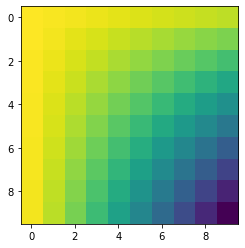

In [5]:
import matplotlib.pyplot as plt
# plt.contourf(np.linspace(0.1, 1.1, 10), np.linspace(0.1, 1.1, 10), rem)
plt.imshow(rem)

In [9]:
for alpha in np.arange(10):
    for gamma in np.arange(10):
        if rem[alpha,gamma] > 0:
            print("alpha : ", alpha, "    gamma : ", gamma)

alpha :  0     gamma :  0
alpha :  1     gamma :  0
alpha :  2     gamma :  0
alpha :  3     gamma :  0
alpha :  4     gamma :  0


In [12]:
import sys
sys.path.append("../StockPriceForecast/")
from libs.modules import *
from libs.modules import SoftDTW
import torch

data = torch.rand(1440, 30, 1)
target = torch.rand(1440, 30, 1)
data.requires_grad=True
target.requires_grad=True

loss_func = SoftDTW(gamma=1.0, normalize=True, use_cuda=False)
loss = loss_func(data, target)
print(loss)

tensor([1.9067, 1.2480, 1.0028,  ..., 3.9965, 1.8696, 1.5548],
       grad_fn=<SubBackward0>)


In [2]:
print(loss.shape)

torch.Size([1440])


In [13]:
l = loss.sum() / len(loss)
print(l)
print(l.shape)

tensor(1.6308, grad_fn=<DivBackward0>)
torch.Size([])


In [14]:
l.backward()

In [15]:
print(data.grad)

tensor([[[-1.4350e-04],
         [-1.7156e-04],
         [-1.1066e-04],
         ...,
         [ 5.1378e-04],
         [ 5.0852e-04],
         [-8.6213e-05]],

        [[-2.6962e-04],
         [-3.5318e-04],
         [-4.8001e-04],
         ...,
         [-5.1079e-04],
         [-3.0123e-04],
         [-3.3301e-04]],

        [[ 4.8713e-04],
         [ 6.3158e-05],
         [ 4.7763e-04],
         ...,
         [-1.3494e-04],
         [-6.6877e-05],
         [ 1.2715e-04]],

        ...,

        [[ 4.6927e-04],
         [ 7.0821e-04],
         [ 6.5156e-04],
         ...,
         [-1.1326e-03],
         [-1.2339e-03],
         [-1.6362e-03]],

        [[-4.6340e-04],
         [ 7.4921e-06],
         [-5.8816e-05],
         ...,
         [-4.1563e-04],
         [-5.7258e-04],
         [-5.0807e-04]],

        [[ 6.7547e-05],
         [-2.4659e-04],
         [-3.7764e-04],
         ...,
         [-7.9612e-06],
         [-1.5325e-04],
         [-7.7340e-04]]])


In [1]:
from tqdm import tqdm
for i in tqdm(range(10)):
    for j in tqdm(range(10)):
        pass


100%|██████████| 10/10 [00:00<00:00, 65638.56it/s]

100%|██████████| 10/10 [00:00<00:00, 80971.12it/s]

100%|██████████| 10/10 [00:00<00:00, 83385.77it/s]

100%|██████████| 10/10 [00:00<00:00, 145131.63it/s]

100%|██████████| 10/10 [00:00<00:00, 82891.38it/s]

100%|██████████| 10/10 [00:00<00:00, 138884.24it/s]

100%|██████████| 10/10 [00:00<00:00, 169809.88it/s]

100%|██████████| 10/10 [00:00<00:00, 106454.42it/s]

100%|██████████| 10/10 [00:00<00:00, 53.34it/s]


In [3]:
# Run on GPU server
import sys
sys.path.append("../StockPriceForecast/")
from libs import *
dataPath = "../StockPriceForecast/dataSet/data/marketData/data.nc"
data_len = DataLength(dataPath)
input_days = 360
predict_days = 30
test_predict_len = 360  # 预测360天
train_dataSet = DataSet(dataPath=dataPath, isel=[0, data_len - input_days - test_predict_len],
                        encoderDecoderParameter=None,
                        targetDataParameter="close")

In [4]:
enc, dec, tar = train_dataSet[0]
print(enc.shape)
print(dec.shape)
print(tar.shape)

torch.Size([360, 1440, 10])
torch.Size([30, 1440, 10])
torch.Size([30, 1440, 1])
